<a href="https://colab.research.google.com/github/PhanTruc27/Bamboo/blob/main/Assignment_2_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [307]:

from google.colab import files
uploaded = files.upload()



Saving shopping_behavior_updated.csv to shopping_behavior_updated (7).csv


In [308]:
df=pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


PART 1


In [309]:
# Summarize the dataset's statistical properties.
df.info()
#3900 rows 18 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [310]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [311]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))

# specific types of data

Numeric columns: 5
Categorical columns: 13


In [312]:
df.select_dtypes(include=np.number).corr()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


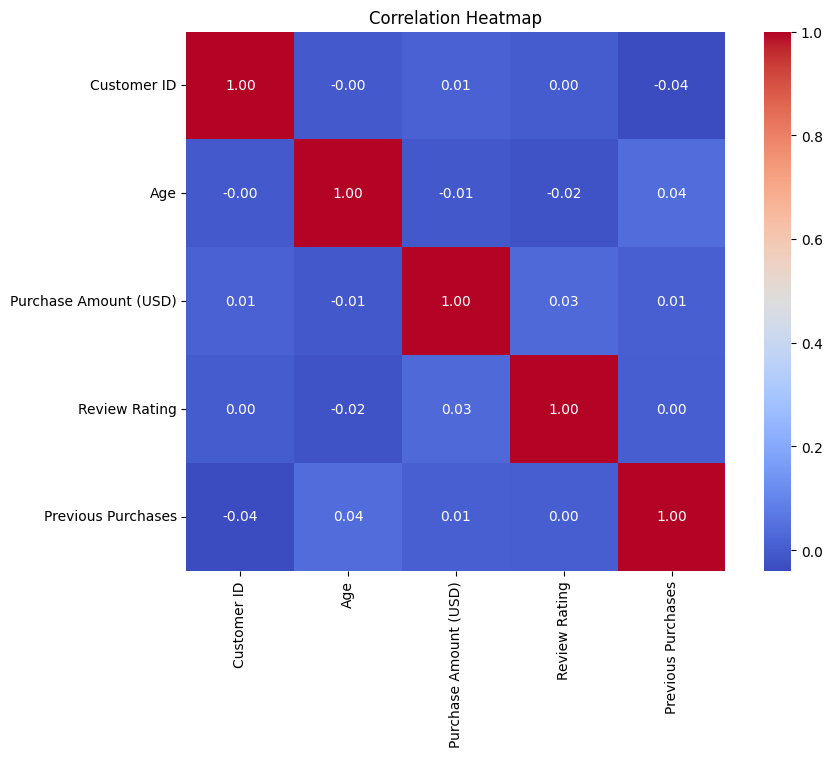

In [313]:

# take numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

# draw heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


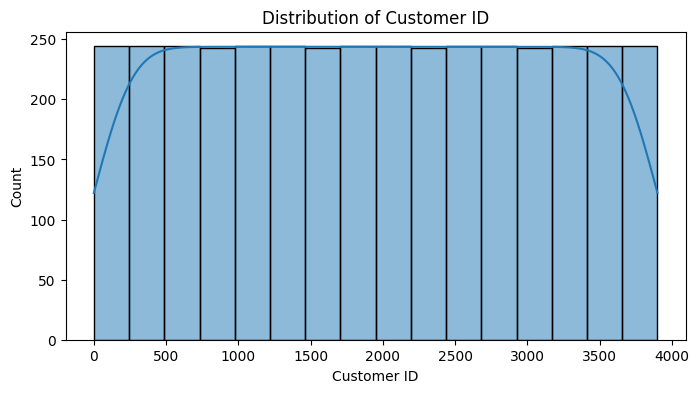

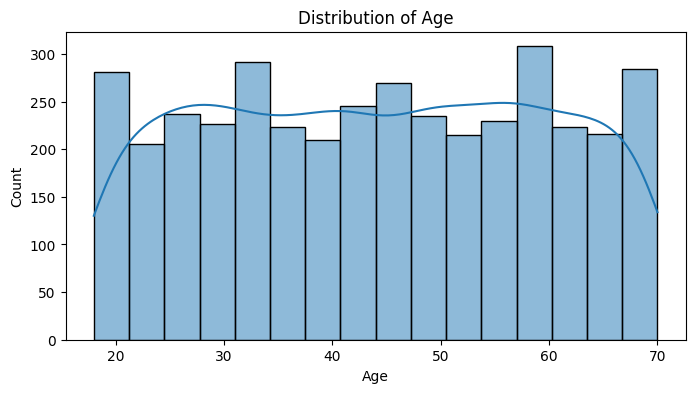

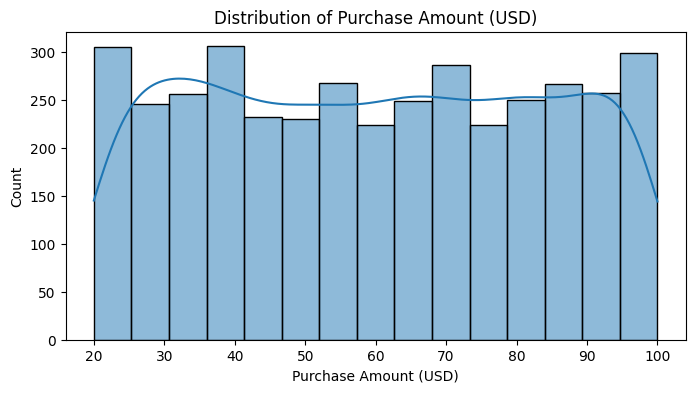

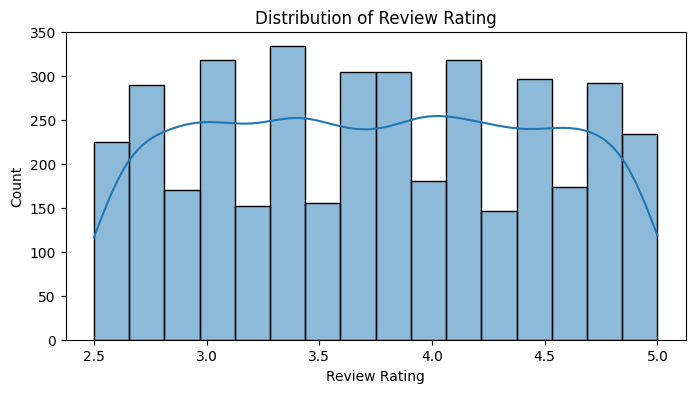

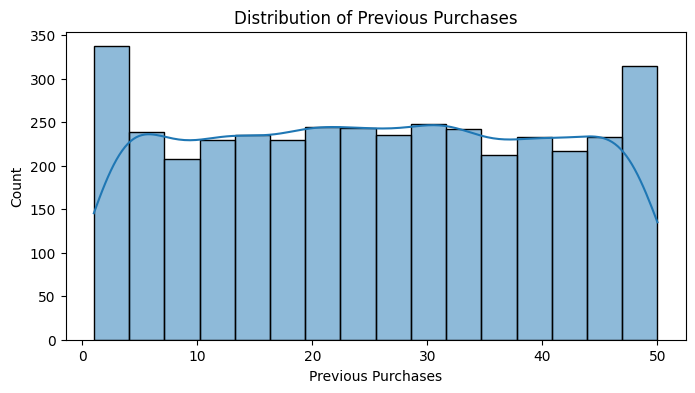

In [314]:
#histogram (numeric columns)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [315]:
display(df.describe(include='object'))
# describe data (categorical)

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [316]:
#Identify and clean data

# Check for missing values
df.isnull().sum()
#no missing data


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [317]:

# Check duplicated -> no duplicates values
df.duplicated().sum()

np.int64(0)

PART 2


In [318]:
df['Location'].value_counts()
#there are many location

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


In [319]:
# Create lists by region
The_South = ["Alabama","Arkansas","Georgia","Florida","Kentucky",
             "Louisiana","Mississippi","North Carolina","South Carolina",
             "Tennessee","West Virginia","Virginia"]

Midwest = ["Illinois","Indiana","Iowa","Ohio","Michigan","Minnesota",
           "Missouri","Wisconsin","North Dakota","South Dakota",
           "Nebraska","Kansas"]

West_and_MountainWest = ["Montana","Idaho","Nevada","Utah","Arizona","Colorado",
                         "Wyoming","New Mexico","Alaska","Washington","Oregon",
                         "California","Hawaii","Texas"]

Northeast_and_MidAtlantic = ["New York","New Jersey","Pennsylvania","Massachusetts",
                             "Connecticut","Maryland","Delaware","Rhode Island",
                             "New Hampshire","Vermont"]

# assign region
def get_region(x):
    if x in The_South: return "The_South"
    if x in Midwest: return "Midwest"
    if x in West_and_MountainWest: return "West_and_MountainWest"
    if x in Northeast_and_MidAtlantic: return "Northeast_and_Mid-Atlantic"
    return None

# new name
df["Region"] = df["Location"].apply(get_region)



In [320]:
df['Region'].value_counts()


,count
Region,
West_and_MountainWest,1095
The_South,947
Midwest,937
Northeast_and_Mid-Atlantic,769


In [321]:
df['Item Purchased'].value_counts()
#also many values

,count
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


In [322]:
products = df['Item Purchased'].value_counts().to_dict()
upper_wear = ["Blouse", "Shirt", "Dress", "Sweater", "Jacket", "Coat", "Hoodie", "T-shirt"]
lower_wear = ["Pants", "Skirt", "Shorts", "Jeans"]
footwear = ["Sandals", "Shoes", "Sneakers", "Boots", "Socks"]
accessories = ["Jewelry", "Sunglasses", "Belt", "Scarf", "Hat", "Handbag", "Backpack", "Gloves"]

# Initialize dictionary to store results
classified = {"Upper Wear": {}, "Lower Wear": {}, "Footwear": {}, "Accessories": {}}

# Classify products
for item, count in products.items():
    if item in upper_wear:
        classified["Upper Wear"][item] = count
    elif item in lower_wear:
        classified["Lower Wear"][item] = count
    elif item in footwear:
        classified["Footwear"][item] = count
    elif item in accessories:
        classified["Accessories"][item] = count

# Print results
for category, items in classified.items():
    print(f"{category}:")
    for name, count in items.items():
        print(f"  {name} – {count}")
    print()

Upper Wear:
  Blouse – 171
  Shirt – 169
  Dress – 166
  Sweater – 164
  Jacket – 163
  Coat – 161
  Hoodie – 151
  T-shirt – 147

Lower Wear:
  Pants – 171
  Skirt – 158
  Shorts – 157
  Jeans – 124

Footwear:
  Sandals – 160
  Socks – 159
  Shoes – 150
  Sneakers – 145
  Boots – 144

Accessories:
  Jewelry – 171
  Sunglasses – 161
  Belt – 161
  Scarf – 157
  Hat – 154
  Handbag – 153
  Backpack – 143
  Gloves – 140



In [323]:
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [324]:
# color (nominal) but many values and we cann not classify in normal way
color_counts = df['Color'].value_counts()

# Choose most appear one
common_colors = color_counts[color_counts >= 160].index

#  "Other"
df['Color_simplified'] = df['Color'].apply(lambda x: x if x in common_colors else 'Other')


In [325]:
df['Color_simplified'].value_counts()

,count
Color_simplified,
Other,2536
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Violet,166
Cyan,166


In [326]:
size_order = {'XS':1, 'S':2, 'M':3, 'L':4, 'XL':5}
df['size_encoded'] = df['Size'].map(size_order)
df['size_encoded']
# order

,size_encoded
0,4
1,4
2,2
3,3
4,3
...,...
3895,4
3896,4
3897,4
3898,2


In [327]:
df_1=df.drop(['Customer ID','Item Purchased', 'Location','Size'],axis=1)
df_1

,Age,Gender,Category,Purchase Amount (USD),Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region,Color_simplified,size_encoded
0,55,Male,Clothing,53,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,The_South,Other,4
1,19,Male,Clothing,64,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,None,Other,4
2,50,Male,Clothing,73,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Northeast_and_Mid-Atlantic,Other,2
3,21,Male,Footwear,90,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Northeast_and_Mid-Atlantic,Other,3
4,45,Male,Clothing,49,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,West_and_MountainWest,Other,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,The_South,Other,4
3896,52,Female,Accessories,49,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Midwest,Other,4
3897,46,Female,Accessories,33,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Northeast_and_Mid-Atlantic,Green,4
3898,44,Female,Footwear,77,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Midwest,Other,2


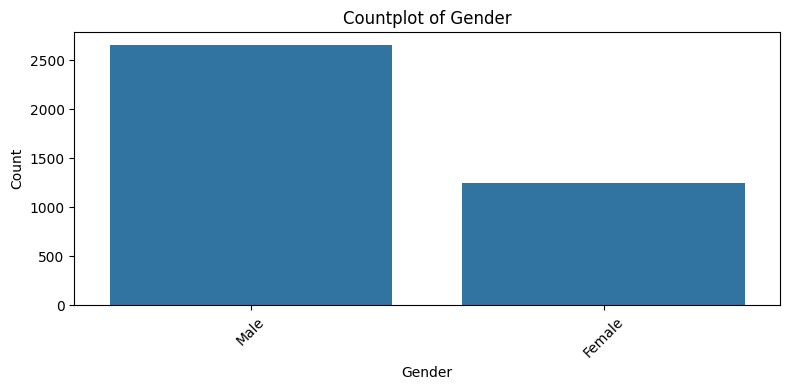

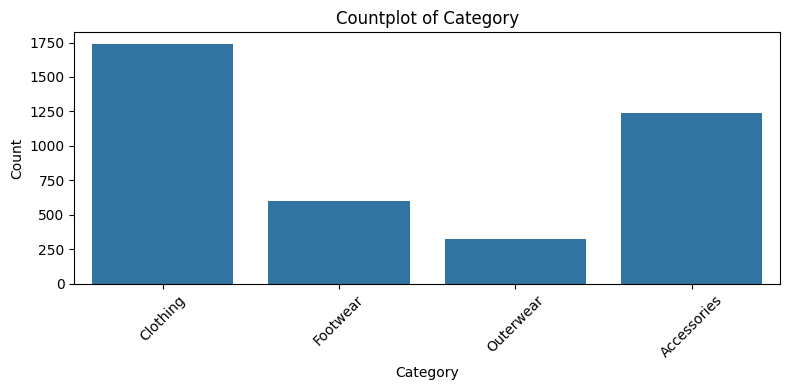

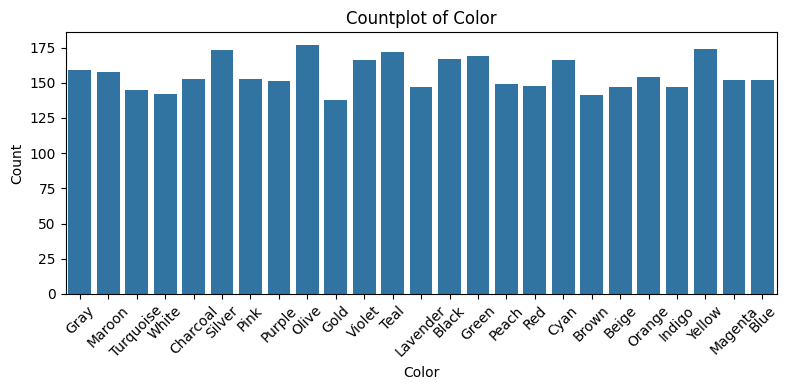

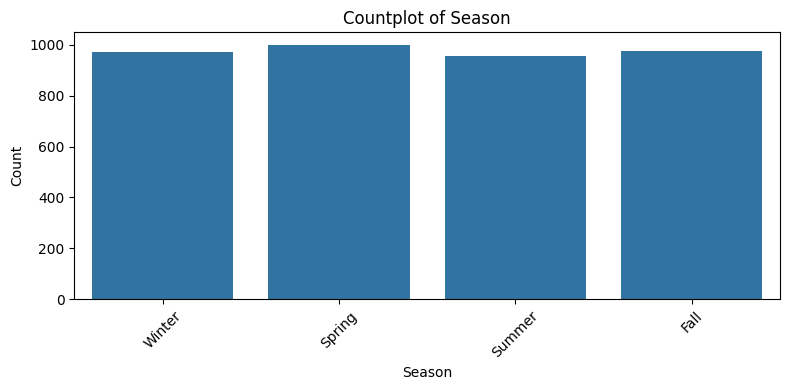

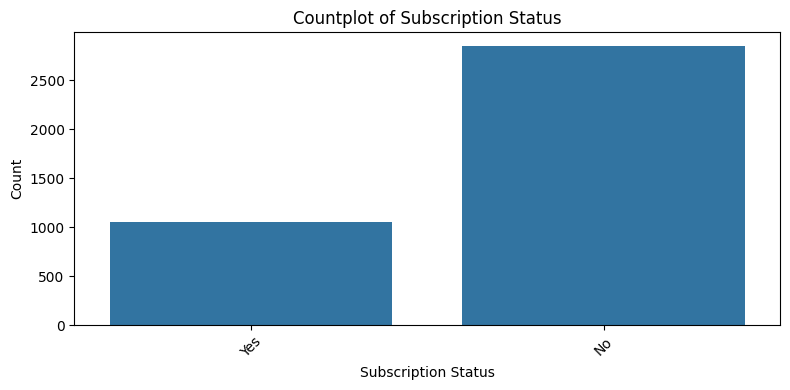

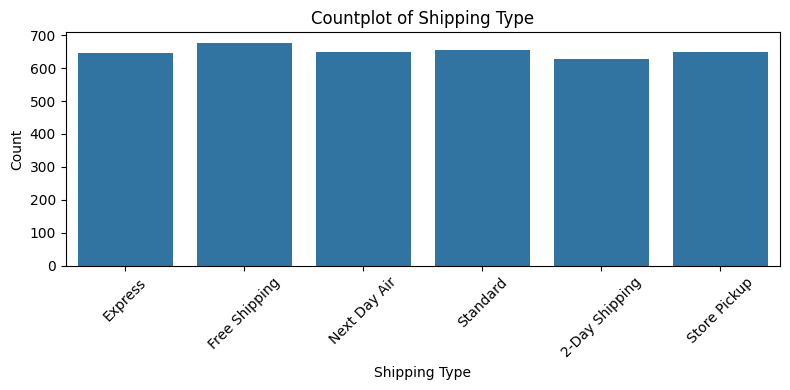

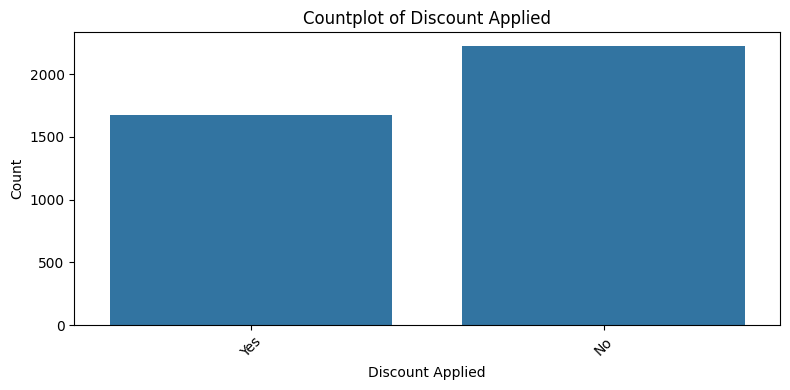

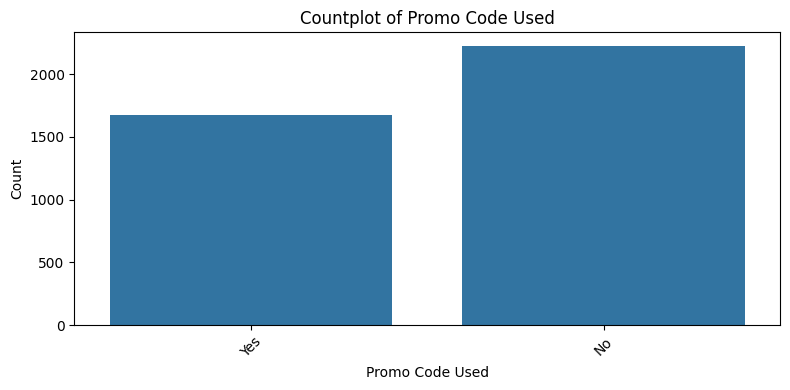

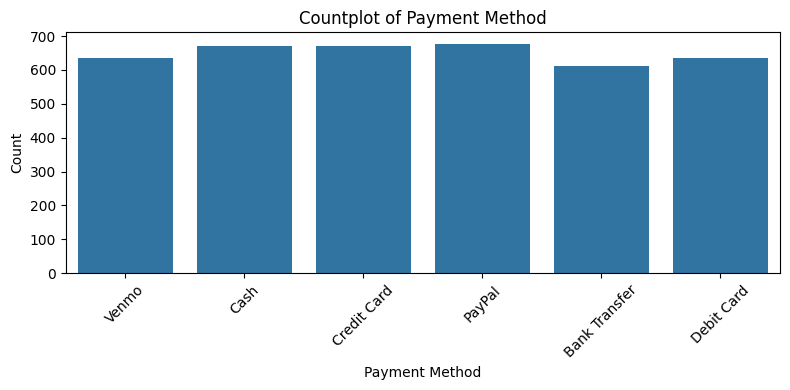

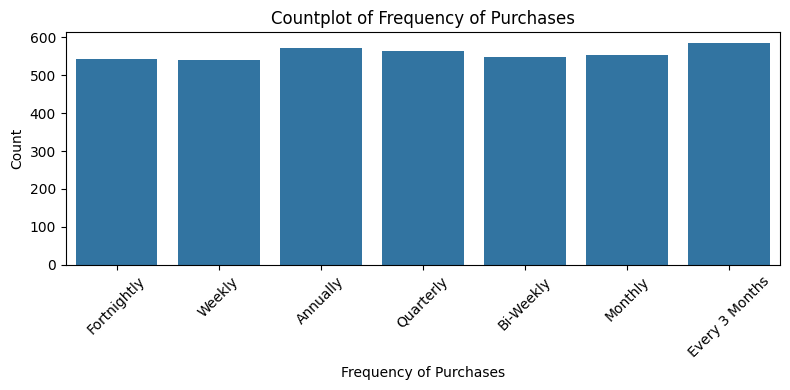

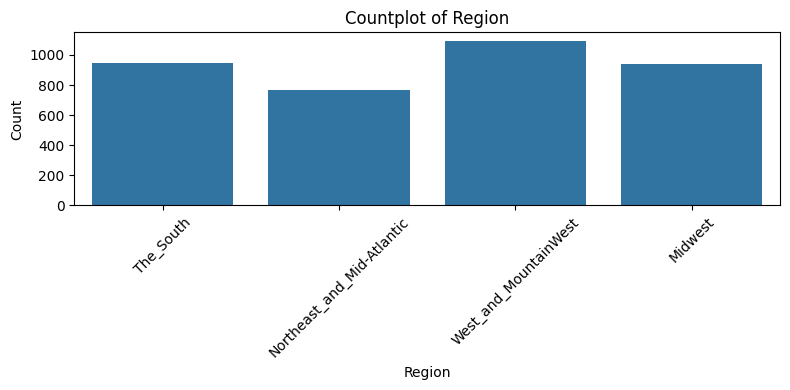

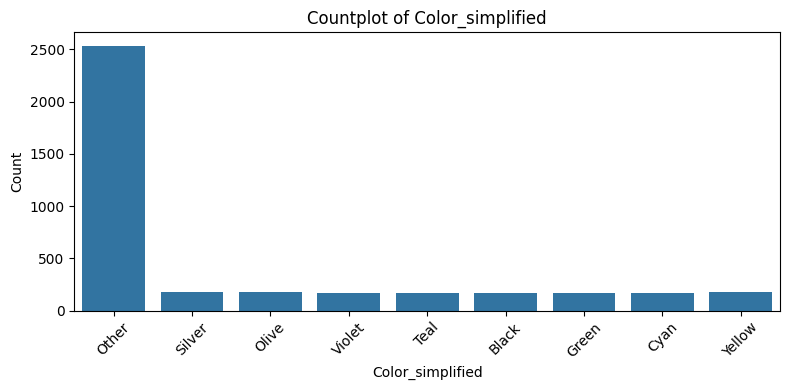

In [328]:

#histogram (categorical columns) after classify

categorical_cols = df_1.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [329]:
#Many : color, size, season, shipping type, Payment Method,Region
#One : Gender, 'Subscription Status','Discount Applied

In [330]:
#Import library

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [331]:
df_1

,Age,Gender,Category,Purchase Amount (USD),Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region,Color_simplified,size_encoded
0,55,Male,Clothing,53,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,The_South,Other,4
1,19,Male,Clothing,64,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,None,Other,4
2,50,Male,Clothing,73,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Northeast_and_Mid-Atlantic,Other,2
3,21,Male,Footwear,90,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Northeast_and_Mid-Atlantic,Other,3
4,45,Male,Clothing,49,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,West_and_MountainWest,Other,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,The_South,Other,4
3896,52,Female,Accessories,49,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Midwest,Other,4
3897,46,Female,Accessories,33,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Northeast_and_Mid-Atlantic,Green,4
3898,44,Female,Footwear,77,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Midwest,Other,2


In [332]:
# Feature Engineering

X = df_1[['Age','Gender','Category','Purchase Amount (USD)','size_encoded',
          'Season','Subscription Status','Shipping Type','Discount Applied',
          'Payment Method','Frequency of Purchases','Region','Color_simplified']].copy()

# Encode binary
X['Gender'] = X['Gender'].map({'Female':0, 'Male':1})
X['Subscription Status'] = X['Subscription Status'].map({'No':0, 'Yes':1})
X['Discount Applied'] = X['Discount Applied'].map({'No':0, 'Yes':1})

# TargetEncoder cho các biến nominal
nominal_cols = ['Category', 'Season', 'Shipping Type','Payment Method',
                'Frequency of Purchases','Region','Color_simplified']





In [333]:
# #Split the data into training and test sets.
from category_encoders import TargetEncoder

te = TargetEncoder(cols=nominal_cols)
X[nominal_cols] = te.fit_transform(X[nominal_cols], y)

y = (df_1['Review Rating'] > 3.5).astype(int) # Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [334]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

#  Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

This code snippet trains an AI model using the Logistic Regression algorithm. First, it imports the necessary tool from the sklearn library, then initializes a model with optimization settings (running up to 1000 iterations). Finally, it uses the .fit() command to feed the training data (X_train, y_train) into the model, helping it learn patterns so it is ready for future predictions.

In [335]:
# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5525641025641026
Precision: 0.55198973042362
Recall: 1.0
F1-score: 0.7113316790736146
ROC-AUC: 0.5681328903654485

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       350
           1       0.55      1.00      0.71       430

    accuracy                           0.55       780
   macro avg       0.78      0.50      0.36       780
weighted avg       0.75      0.55      0.39       780



Accuracy (0.55) : The model is correct on 57% of all samples. This is low and close to random guessing.

Precision (0.55) :Only 55% of the predictions labeled as class 1 are correct. This indicates many false positives.

Recall (1.0) :The model detects 100% of class-1 samples. This happens because the model predicts everything as class 1.

F1-score (0.71) :This score balances precision and recall for class 1. It's decent for class 1 but doesn’t reflect overall performance.

Class 0: recall = 0.00 :The model does not correctly identify any class-0 samples. This means class 0 is completely ignored.

Class 1: recall = 1.00 :The model predicts all samples as class 1, so it never misses class-1 samples. This creates heavy imbalance.

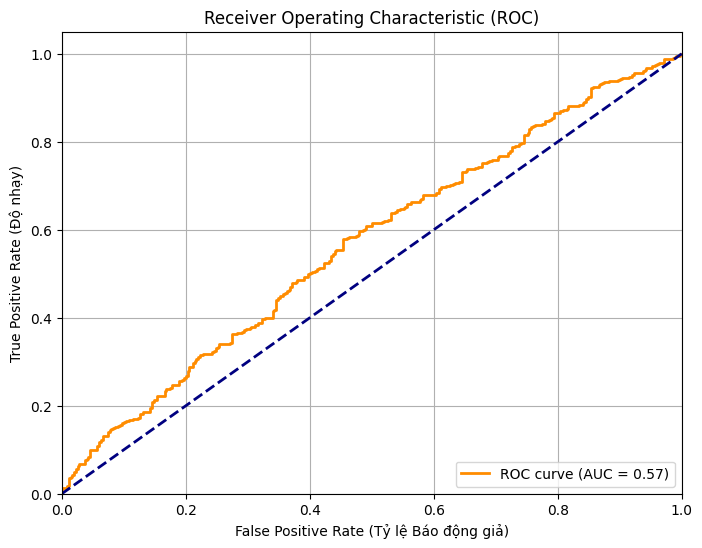

In [336]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Đường chéo ngẫu nhiên
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Độ nhạy)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The Score (AUC): 0.63 (out of a max of 1.0).

The Verdict: The model's performance is Mediocre / Below Average.

It is better than random guessing (because the orange line is above the blue dotted line).

However, it is not smart enough for real-world application yet (the orange line is too low; a good model should curve sharply toward the top-left corner).